In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
import torch.nn as nn
from custommodels import LoadDataset, ResNet50, DenseNet121, MobileNetV2
from training import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [8]:
db = "HAM"
root = f"../../dataset/CAI 2025/{db}/"
df_train = pd.read_csv(f"{root}/dataframe/df_distance_train.csv")
df_valid = pd.read_csv(f"{root}/dataframe/df_distance_valid.csv")
df_test = pd.read_csv(f"{root}/dataframe/df_distance_test.csv")

loader = LoadDataset(label="label", batch_size=8)
train_loader, valid_loader, test_loader = loader.create_dataloaders(df_train, df_valid, df_test)

Width: 200 Height: 150


# MobileNet

In [9]:
models = ["RES", "DENSE", "MOBILE"]

model_save_directory = f"{root}models/{models[2]}/"
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    print(f"{model_save_directory} created.")
else:
    print(f"{model_save_directory} aready exist.")
        
df_valid_filepath = f"{root}dataframe/df_valid_{models[2]}.csv"
df_test_filepath = f"{root}dataframe/df_test_{models[2]}.csv"

../../dataset/CAI 2025/HAM/models/MOBILE/ aready exist.


Validation Accuracy: 0.6009 | Loss: 0.8574 | F1: 0.5695
Validation Accuracy: 0.6297 | Loss: 0.8196 | F1: 0.6235
Validation Accuracy: 0.6404 | Loss: 0.7998 | F1: 0.6347
Validation Accuracy: 0.6373 | Loss: 0.7949 | F1: 0.6332
Validation Accuracy: 0.6616 | Loss: 0.7494 | F1: 0.6593
Validation Accuracy: 0.6464 | Loss: 0.7691 | F1: 0.6401
Validation Accuracy: 0.6692 | Loss: 0.7344 | F1: 0.6658
Validation Accuracy: 0.6768 | Loss: 0.7366 | F1: 0.6746
Validation Accuracy: 0.6768 | Loss: 0.7220 | F1: 0.6760
Validation Accuracy: 0.6859 | Loss: 0.6992 | F1: 0.6840
Validation Accuracy: 0.6419 | Loss: 0.7550 | F1: 0.6325
Validation Accuracy: 0.6798 | Loss: 0.7101 | F1: 0.6782
Validation Accuracy: 0.6783 | Loss: 0.7089 | F1: 0.6695
Validation Accuracy: 0.6798 | Loss: 0.7096 | F1: 0.6753
Validation Accuracy: 0.6798 | Loss: 0.6984 | F1: 0.6783
Validation Accuracy: 0.6859 | Loss: 0.6790 | F1: 0.6825
Validation Accuracy: 0.6753 | Loss: 0.7100 | F1: 0.6688
Validation Accuracy: 0.7026 | Loss: 0.6848 | F1:

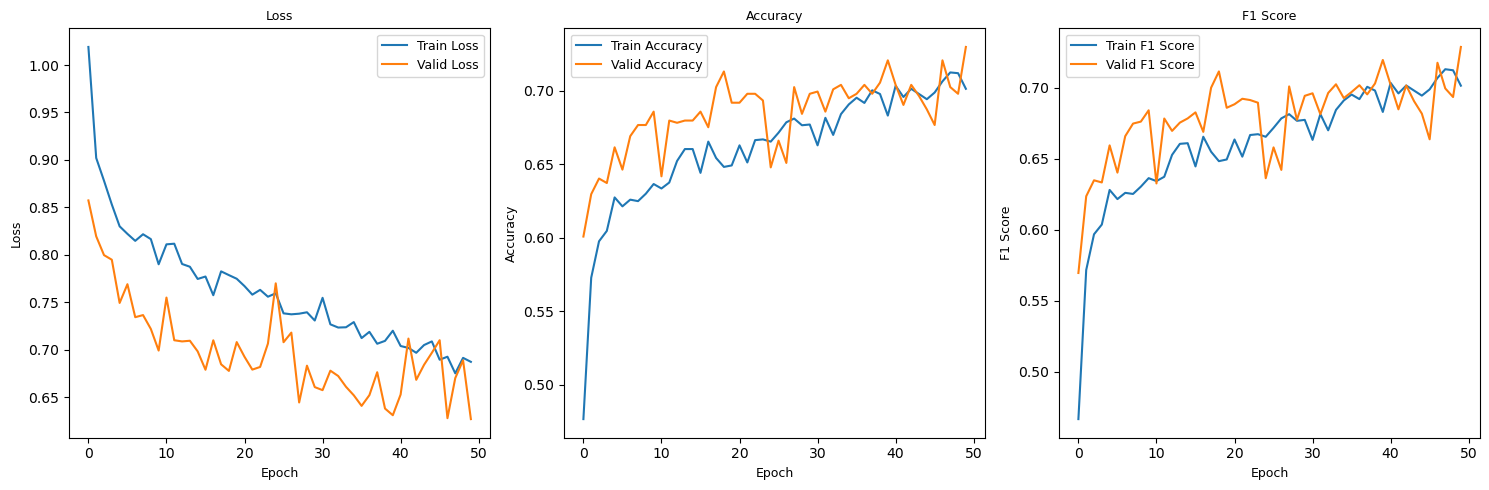

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       219
           1       0.72      0.65      0.69       220
           2       0.79      0.70      0.74       220

    accuracy                           0.73       659
   macro avg       0.73      0.73      0.73       659
weighted avg       0.73      0.73      0.73       659

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       220
           1       0.75      0.64      0.69       219
           2       0.76      0.71      0.74       220

    accuracy                           0.73       659
   macro avg       0.74      0.73      0.73       659
weighted avg       0.74      0.73      0.73       659



In [11]:
num_class = 3
num_epochs = 50
lr = 1e-5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training
model = MobileNetV2(num_class).to(device)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr)

# Validation
model.load_state_dict(torch.load(best_val_file))
test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
df_valid["pred"] = test_predictions
df_valid["proba"] = test_outputs
df_valid.to_csv(df_valid_filepath, index=False)

# Test
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
df_test["pred"] = test_predictions
df_test["proba"] = test_outputs
df_test.to_csv(df_test_filepath, index=False)